# Ecuaciones diferenciales con la libreria Sympy

Aquí se da un breve repaso de cómo resolver ecuaciones diferenciales haciendo uso de la librería Sympy de Python y se resolverán los siguientes tipos de ecuaciones diferenciales.



*   Ecuaciones diferenciales ordinarias de variable separable
*   Ecuaciones diferenciales ordinarias Homogeneas
*   Ecuaciones diferenciales ordinarias de Bernoulli

# Ecuaciones diferenciales ordinarias de variable separable

Si de la ecuacion diferencial ordinaria de primer orden y primer grado que es:

$$\dfrac{dy}{dx}=f(x,y)$$

Se puede expresar de la siguiente manera:

$$M(x)dx+N(y)dy=0$$

Entonces a la ecuación se le denomina ecuación diferencial ordinaria de variable separable y la solución general se obtiene por integración directa, es decir:

$$\int M(x)dx+\int N(y)dy=c$$

**Ejercicio 1:** Resolver la siguiente ecuación diferencial.

$$-(x^2y+x^2)dx+\sqrt{1+x^3}dy=0$$

**Solución:**

**Paso 1.** Reescribiremos la ecuación diferencial de la forma $\dfrac{dy}{dx}=f(x,y)$ o sea:

$$\dfrac{dy}{dx}=\dfrac{x^2y+x^2}{\sqrt{1+x^3}}$$

**Paso 2.** Definimos las variables de la ecuación diferencial.

In [ ]:
from sympy import *

y = Function("y")
x = symbols("x")

**Paso 3.** Escribimos la ecuación diferencial.

Para escribir la ecuación diferencial se utiliza la función Eq.

```
Eq(miembro_izquierdo_de_la_igualdad , miembro_derecho_de_la_igualdad)
```



In [ ]:
edo = Eq(diff(y(x),x),(y(x)*x**2+x**2)/sqrt(1+x**3))
edo

Eq(Derivative(y(x), x), (x**2*y(x) + x**2)/sqrt(x**3 + 1))

**Paso 4.** Para resolver la ecuación diferencial se utiliza la función:

```
dsolve(ecuacion_diferencial,variable_dependiente)
```



In [ ]:
dsolve(edo,y(x))

Eq(y(x), C1*exp(2*sqrt(x**3 + 1)/3) - 1)

Esta última expresión es la solución general de la ecuación diferencial.

**Ejercicio 2.** Resolver la siguiente ecuación diferencial.

$$\dfrac{dy}{dx}=-\dfrac{e^{2x-y}}{e^{y-2x}}$$

**Solución**

**Paso 1.** Escribir la ecuación en la forma $\dfrac{dy}{dx}=f(x,y)$

En este caso no hace falta, ya que la ecuación está escrita en la forma deseada.

**Paso 2.** Definir la variables de la ecuación diferencial.

In [ ]:
y = Function("y")
x = symbols("x")

**Paso 3.** Escribimos la ecuación diferencial.

In [42]:
edo2 = Eq( diff(y(x),x),-(exp(2*x-y(x))/exp(y(x)-2*x)) )
edo2

Eq(Derivative(y(x), x), -exp(4*x - 2*y(x)))

**Paso 4.** Escribimos la solución de la ecuación diferencial.

In [43]:
dsolve(edo2,y(x))

[Eq(y(x), log(-sqrt(C1 - 2*exp(4*x))) - log(2)),
 Eq(y(x), log(C1 - 2*exp(4*x))/2 - log(2))]

En este caso, nos imprime una lista con dos soluciones y para acceder a la primera solución se utilizan los corchetes y se escribe el índice que en este caso será cero para la primera solución.

In [44]:
dsolve(edo2,y(x))[0]

Eq(y(x), log(-sqrt(C1 - 2*exp(4*x))) - log(2))

**Ejercicio 3.** Resolver la siguiente ecuación diferencial.

$$e^y\Big(\dfrac{dy}{dx}+1\Big)=1$$

**Solución**


**Paso 1.** Escribir la ecuación en la forma $\dfrac{dy}{dx}=f(x,y)$

$$\dfrac{dy}{dx}+1=\dfrac{1}{e^y}$$
$$\dfrac{dy}{dx}=\dfrac{1}{e^y}-1$$
$$\dfrac{dy}{dx}=\dfrac{1}{e^y}-\dfrac{e^y}{e^y}$$
$$\dfrac{dy}{dx}=\dfrac{1-e^y}{e^y}$$

**Paso 2.** Definir las variables de la ecuación diferencial.

In [ ]:
y = Function("y")
x = symbols("x")

**Paso 3.** Escribimos la ecuación diferencial.

In [ ]:
edo3 = Eq( diff(y(x),x),(1-exp(y(x)))/(exp(y(x))) )
edo3

Eq(Derivative(y(x), x), (1 - exp(y(x)))*exp(-y(x)))

**Paso 4.** Escribimos la solución de la ecuación diferencial.

In [ ]:
dsolve(edo3,y(x))

Eq(y(x), log(C1*exp(-x) + 1))

Hasta ahora solo se han obtenido las soluciones generales de las ecuaciones diferenciales, pero las soluciones generales son una familia de soluciones de la ecuación diferencial con parámetro $C_1$ y para determinar el valor de $C_1$ se evalúa una condición inicial.

Para agregar las condiciones iniciales haciendo uso de la librería Sympy se utiliza un pequeño diccionario y que en este caso llamaremos ```ci``` (condición inicial).
```
ci = {y(a):b} # ci : condicion inicial
```
Y a su vez, para agregar esta condición inicial en la solución de la ecuación diferencial, se va a aguardar el diccionario en la variable ```ics ```.
```
dsolve(ecuacion_diferencial , variable_dependiente , ics = ci)
```

**Ejercicio 1**

Resuelva la ecuación diferencial sujeta a la condición inicial.

$$y-x\dfrac{dy}{dx}=3(1+x^2y) \hspace{1cm}y(1)=2$$

**Solución**

**Paso 1.**
Escribimos la ecuación en la forma $\dfrac{dy}{dx}=f(x,y)$  definimos las variables y escribimos la ecuación diferencial.

$$\dfrac{dy}{dx}=\dfrac{3(1+x^2y)-y}{-x}$$






In [15]:
y = Function("y")
x = symbols("x")

Edo4 = Eq(diff(y(x),x),(3*(1+x**2*y(x))-y(x))/(-x))
Edo4

Eq(Derivative(y(x), x), -(3*x**2*y(x) - y(x) + 3)/x)

**Paso 2.** Definimos el diccionario con la condición inicial.

In [21]:
ci = {y(1):2}

**Paso 3.** Escribimos la solución de la ecuación diferencial con las condiciones iniciales.

In [24]:
dsolve(Edo4,y(x),ics=ci)

Eq(y(x), -3*sqrt(6)*sqrt(pi)*x*exp(-3*x**2/2)*erfi(sqrt(6)*x/2)/2 + x*(-exp(3/2) + 3*sqrt(6)*sqrt(pi)*erfi(sqrt(6)/2)/2)*exp(-3*x**2/2) + 3)

**Ejercicio 2**

Resuelva la ecuación diferencial sujeta a la condición inicial.

$$e^{-y}(1+\dfrac{dy}{dx})=1 \hspace{1cm}y(0)=1$$

**Solución**

**Paso 1.**
Escribimos la ecuación en la forma $\dfrac{dy}{dx}=f(x,y)$  definimos las variables y escribimos la ecuación diferencial.

$$\dfrac{dy}{dx}=e^y-1$$

In [26]:
y = Function("y")
x = symbols("x")

Edo5 = Eq(diff(y(x),x),exp(y(x))-1)
Edo5

Eq(Derivative(y(x), x), exp(y(x)) - 1)

**Paso 2.** Definimos el diccionario con la condición inicial.

In [30]:
ci2 = {y(0):1}

**Paso 3.** Escribimos la solución de la ecuación diferencial con las condiciones iniciales.

In [38]:
dsolve(Edo5,y(x),ics=ci2)

Eq(x + y(x) - log(exp(y(x)) - 1), 1 - log(-1 + E))

Ya sabiendo la solución general y la solución particular, podemos graficar las soluciones.

**Ejercicio 1.**

Resuelva la ecuación diferencial sujeta a la condición inicial.

$$\dfrac{dy}{dx}=\dfrac{x^2}{y(1+x^3)} \hspace{1cm}y(0)=2$$

**Solución**

**Paso 1.**

Se definen las variables de la ecuación diferencial, se escribe la ecuación diferencial y en esta ocasión no se va a definir una variable que guarde el diccionario de la condición inicial, sino que se va a definir dentro de la función ```Eq()```.

In [47]:
y = Function("y")
x = symbols("x")

sol = dsolve( Eq(diff(y(x),x),x**2/(y(x)*(1+x**3))) , y(x) , ics={y(0):2} )
sol

Eq(y(x), sqrt(6*log(x**3 + 1) + 36)/3)

**Paso 2.** Importamos las librerías para realizar gráficos.

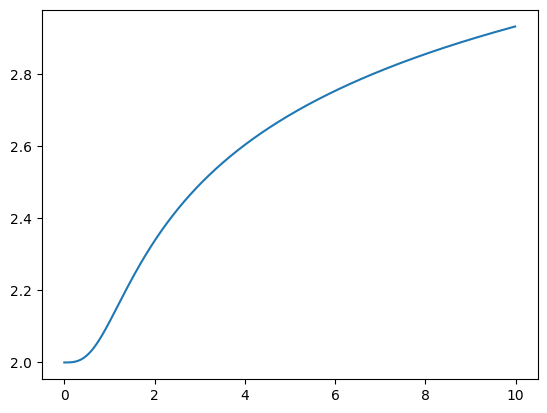

In [56]:
import matplotlib.pyplot as plt
import numpy as np

f = lambdify(x,sol.rhs,"numpy")

x1 = np.arange(0,10,0.01)
y1 = f(x1)

plt.plot(x1,y1)